In [342]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.io import imread, imsave

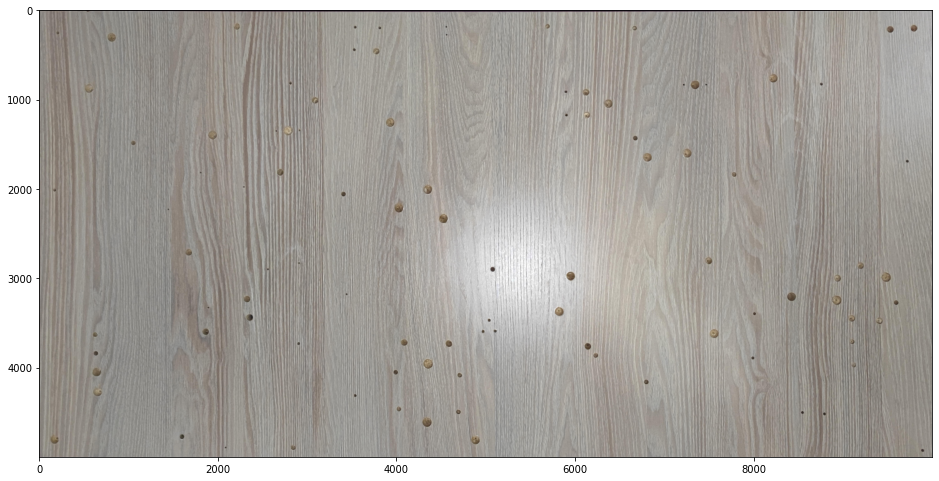

In [343]:
img = imread('res.jpg')
plt.figure(figsize=(16, 9))
plt.imshow(img);

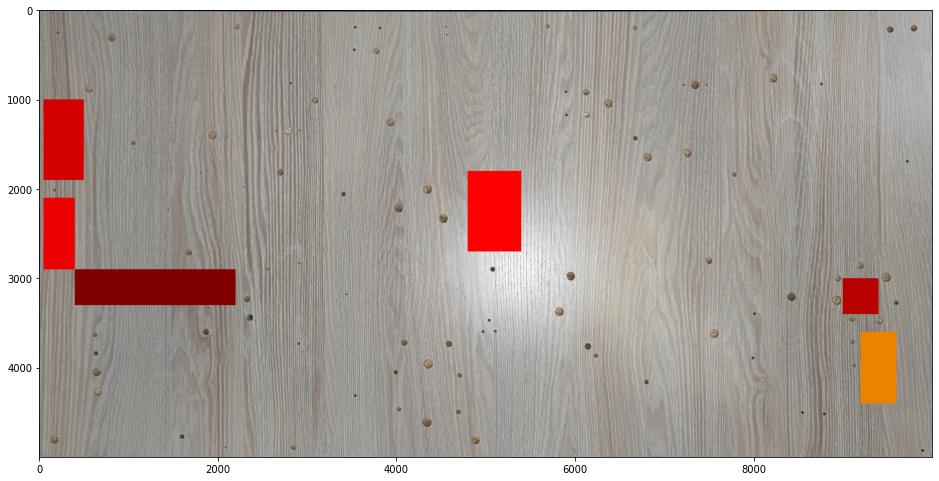

In [346]:
img_tmp = img.copy()
#cv2.rectangle(img_tmp, (4800, 1800), (5400, 2700), (255, 0, 0), -1)
cv2.rectangle(img_tmp, (4800, 1800), (5400, 2700), (255, 0, 0), -1)
#cv2.rectangle(img_tmp, (400, 3300), (2200, 2900), (128, 0, 0), -1)
cv2.rectangle(img_tmp, (400, 3300), (2200, 2900), (128, 0, 0), -1)
#cv2.rectangle(img_tmp, (50, 1900), (500, 1400), (212, 0,  0), -1)
cv2.rectangle(img_tmp, (50, 1900), (500, 1000), (212, 0,  0), -1)
#cv2.rectangle(img_tmp, (9000, 3400), (9400, 3000), (184, 0,  0), -1)
cv2.rectangle(img_tmp, (9000, 3400), (9400, 3000), (184, 0,  0), -1)
#cv2.rectangle(img_tmp, (9200, 4400), (9600, 3600), (237, 130,  0), -1)
cv2.rectangle(img_tmp, (9200, 4400), (9600, 3600), (237, 130,  0), -1)
#cv2.rectangle(img_tmp, (50, 2900), (400, 2000), (237, 0,  0), -1)
cv2.rectangle(img_tmp, (50, 2900), (400, 2100), (237, 0,  0), -1)
plt.figure(figsize=(16, 9))
plt.imshow(img_tmp);

<font color=#7F0000>veneer fragment</font>

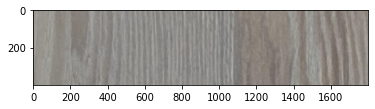

In [347]:
img_veneer = img[2900:3300, 400:2200, :]
plt.imshow(img_veneer);

<font color=#FF0000>highlighted veneer fragment</font>

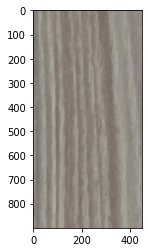

In [348]:
img_nw1 = img[1000:1900, 50:500,:]
plt.imshow(img_nw1)

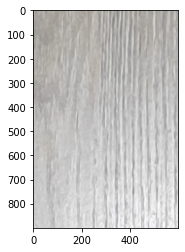

In [349]:
img_hlv = img[1800:2700, 4800:5400, :]
plt.imshow(img_hlv);

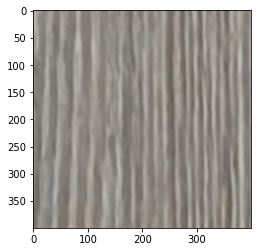

In [350]:
img_nw2 = img[3000:3400, 9000:9400,:]
plt.imshow(img_nw2)

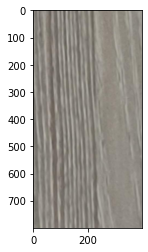

In [351]:
img_nw3 = img[3600:4400, 9200:9600,:]
plt.imshow(img_nw3)

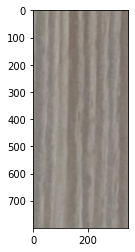

In [354]:
img_nw4 = img[2100:2900, 50:400,:]
plt.imshow(img_nw4)

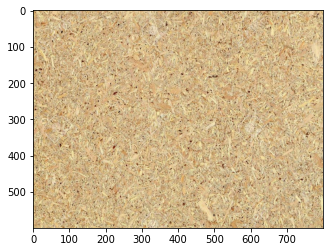

In [355]:
img_dsp = imread('dsp.jpg')
plt.imshow(img_dsp);

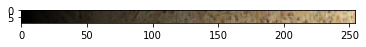

In [356]:
#img_dsp_shadow = img_dsp[:100, :255, :].copy()
img_dsp_shadow = img_dsp[:10, :255, :].copy()

for i in range(255):
    img_dsp_shadow[:, i, :] = (img_dsp_shadow[:, i, :] * (i / 256)).astype(np.uint8)

plt.imshow(img_dsp_shadow);

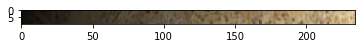

In [357]:
img_dsp_shadow = img_dsp_shadow[:, 20:, :]
plt.imshow(img_dsp_shadow);

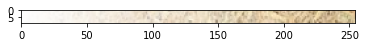

In [358]:
#img_dsp_hl = img_dsp[100:200, :255, :].copy()
img_dsp_hl = img_dsp[100:110, :255, :].copy()

for i in range(255):
    a = i / 255
    b = 255 * (1 - a)
    img_dsp_hl[:, i, :] = ((img_dsp_hl[:, i, :] * a + b)).astype(np.uint8)

plt.imshow(img_dsp_hl);

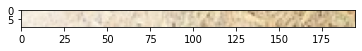

In [359]:
img_dsp_hl = img_dsp_hl[:, 60:, :]
plt.imshow(img_dsp_hl);

In [360]:
def flatten_img(img):
    x, y, c = img.shape
    return img.reshape((x * y, c))

In [361]:
cloud_dsp = np.vstack((
    flatten_img(img_dsp_shadow),
    flatten_img(img_dsp_hl)))

cloud_dsp.shape, cloud_dsp.dtype

((4300, 3), dtype('uint8'))

In [362]:
cloud_veneer = np.vstack((
    flatten_img(img_veneer),
    flatten_img(img_hlv),
    flatten_img(img_nw1),
    flatten_img(img_nw2),
    flatten_img(img_nw3),
    flatten_img(img_nw4)
))

cloud_veneer.shape, cloud_veneer.dtype

((2425000, 3), dtype('uint8'))

In [363]:
cloud_dsp_uniq = np.unique(cloud_dsp, axis=0)

cloud_dsp_uniq.shape

(3735, 3)

In [364]:
cloud_veneer_uniq = np.unique(cloud_veneer, axis=0)

cloud_veneer_uniq.shape

(3810, 3)

In [365]:
cloud_veneer_uniq.shape[0] / cloud_dsp_uniq.shape[0]

1.0200803212851406

In [366]:
from mpl_toolkits.mplot3d import Axes3D

/tmp/ipykernel_53118/3978491402.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=70, elev=10)


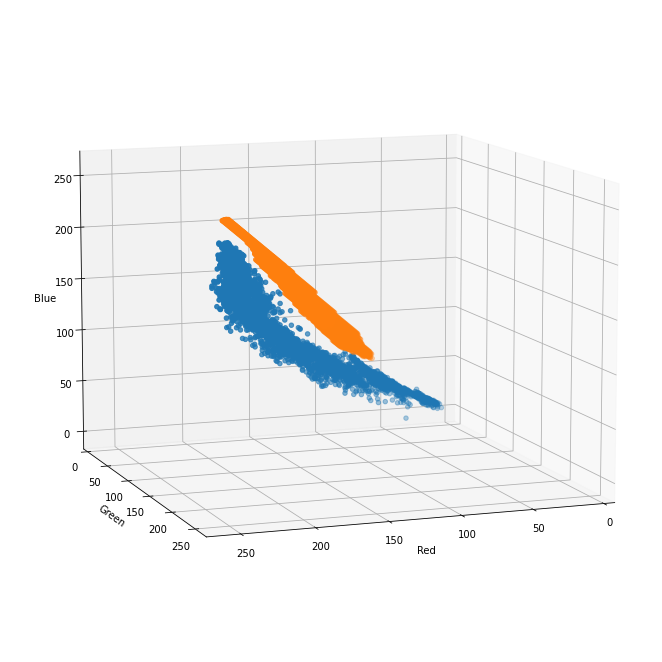

In [367]:
fig = plt.figure(figsize=(9, 9))
ax = Axes3D(fig, azim=70, elev=10)

ax.scatter(*cloud_dsp_uniq.transpose())
ax.scatter(*cloud_veneer_uniq.transpose())
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

plt.show();

In [368]:
# R < r and G < g and B < b

In [369]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [370]:
x_train = np.concatenate((cloud_dsp_uniq, cloud_veneer_uniq))

x_train.shape

(7545, 3)

In [371]:
y_train = np.asarray(
    [[1, 0]] * cloud_dsp_uniq.shape[0] +
    [[0, 1]] * cloud_veneer_uniq.shape[0])

y_train.shape

(7545, 2)

In [372]:
model = Sequential()
model.add(Dense(2, input_dim=3))
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [374]:
model.fit(x_train, y_train, batch_size=100, epochs=300);

Epoch 1/300
76/76 [==============================] - 0s 622us/step - loss: 0.1724 - accuracy: 0.9274
Epoch 2/300
76/76 [==============================] - 0s 633us/step - loss: 0.1707 - accuracy: 0.9288
Epoch 3/300
76/76 [==============================] - 0s 618us/step - loss: 0.1724 - accuracy: 0.9282
Epoch 4/300
76/76 [==============================] - 0s 784us/step - loss: 0.1715 - accuracy: 0.9282
Epoch 5/300
76/76 [==============================] - 0s 677us/step - loss: 0.1747 - accuracy: 0.9260
Epoch 6/300
76/76 [==============================] - 0s 626us/step - loss: 0.1700 - accuracy: 0.9279
Epoch 7/300
76/76 [==============================] - 0s 731us/step - loss: 0.1742 - accuracy: 0.9284
Epoch 8/300
76/76 [==============================] - 0s 724us/step - loss: 0.1728 - accuracy: 0.9309
Epoch 9/300
76/76 [==============================] - 0s 632us/step - loss: 0.1740 - accuracy: 0.9259
Epoch 10/300
76/76 [==============================] - 0s 632us/step - loss: 0.1770 - accura

76/76 [==============================] - 0s 714us/step - loss: 0.1749 - accuracy: 0.9275
Epoch 82/300
76/76 [==============================] - 0s 608us/step - loss: 0.1690 - accuracy: 0.9311
Epoch 83/300
76/76 [==============================] - 0s 622us/step - loss: 0.1723 - accuracy: 0.9300
Epoch 84/300
76/76 [==============================] - 0s 613us/step - loss: 0.1694 - accuracy: 0.9309
Epoch 85/300
76/76 [==============================] - 0s 629us/step - loss: 0.1716 - accuracy: 0.9294
Epoch 86/300
76/76 [==============================] - 0s 663us/step - loss: 0.1728 - accuracy: 0.9303
Epoch 87/300
76/76 [==============================] - 0s 633us/step - loss: 0.1718 - accuracy: 0.9304
Epoch 88/300
76/76 [==============================] - 0s 623us/step - loss: 0.1703 - accuracy: 0.9284
Epoch 89/300
76/76 [==============================] - 0s 685us/step - loss: 0.1678 - accuracy: 0.9268
Epoch 90/300
76/76 [==============================] - 0s 613us/step - loss: 0.1707 - accuracy: 

76/76 [==============================] - 0s 709us/step - loss: 0.1701 - accuracy: 0.9292
Epoch 161/300
76/76 [==============================] - 0s 633us/step - loss: 0.1688 - accuracy: 0.9298
Epoch 162/300
76/76 [==============================] - 0s 606us/step - loss: 0.1689 - accuracy: 0.9319
Epoch 163/300
76/76 [==============================] - 0s 615us/step - loss: 0.1676 - accuracy: 0.9284
Epoch 164/300
76/76 [==============================] - 0s 623us/step - loss: 0.1719 - accuracy: 0.9286
Epoch 165/300
76/76 [==============================] - 0s 605us/step - loss: 0.1700 - accuracy: 0.9279
Epoch 166/300
76/76 [==============================] - 0s 611us/step - loss: 0.1662 - accuracy: 0.9333
Epoch 167/300
76/76 [==============================] - 0s 697us/step - loss: 0.1667 - accuracy: 0.9288
Epoch 168/300
76/76 [==============================] - 0s 612us/step - loss: 0.1702 - accuracy: 0.9276
Epoch 169/300
76/76 [==============================] - 0s 664us/step - loss: 0.1703 - a

76/76 [==============================] - 0s 624us/step - loss: 0.1675 - accuracy: 0.9298
Epoch 240/300
76/76 [==============================] - 0s 678us/step - loss: 0.1699 - accuracy: 0.9319
Epoch 241/300
76/76 [==============================] - 0s 611us/step - loss: 0.1678 - accuracy: 0.9316
Epoch 242/300
76/76 [==============================] - 0s 659us/step - loss: 0.1666 - accuracy: 0.9299
Epoch 243/300
76/76 [==============================] - 0s 621us/step - loss: 0.1707 - accuracy: 0.9282
Epoch 244/300
76/76 [==============================] - 0s 610us/step - loss: 0.1701 - accuracy: 0.9283
Epoch 245/300
76/76 [==============================] - 0s 686us/step - loss: 0.1677 - accuracy: 0.9283
Epoch 246/300
76/76 [==============================] - 0s 604us/step - loss: 0.1675 - accuracy: 0.9296
Epoch 247/300
76/76 [==============================] - 0s 610us/step - loss: 0.1684 - accuracy: 0.9291
Epoch 248/300
76/76 [==============================] - 0s 614us/step - loss: 0.1710 - a

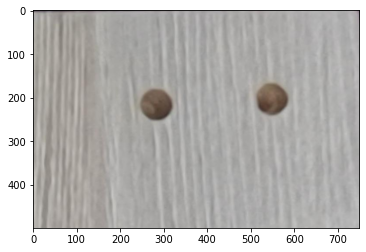

In [375]:
img_sample = img[:500, -750:, :]
plt.imshow(img_sample);

In [376]:
pred_sample = model.predict(flatten_img(img_sample))
pred_sample

array([[1.0599179e-05, 9.9998939e-01],
       [1.0422246e-05, 9.9998963e-01],
       [1.0248304e-05, 9.9998975e-01],
       ...,
       [1.7274378e-04, 9.9982733e-01],
       [1.6985605e-04, 9.9983013e-01],
       [1.6702680e-04, 9.9983299e-01]], dtype=float32)

In [326]:
# img_tmp = pred_sample[:, 0].reshape(img_sample.shape[0], img_sample.shape[1])
# plt.imshow(img_tmp, cmap='gray')
# img_tmp

In [377]:
pred_sample_binary = np.asarray(list(map(lambda x: 0 if x[0] < x[1] else 1, pred_sample)))
pred_sample_binary

array([0, 0, 0, ..., 0, 0, 0])

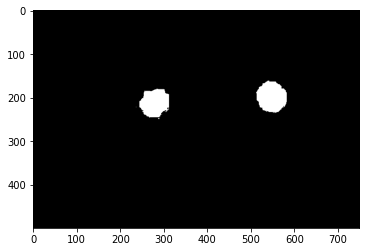

In [378]:
img_tmp = pred_sample_binary.reshape(img_sample.shape[0], img_sample.shape[1])
plt.imshow(img_tmp, cmap='gray')

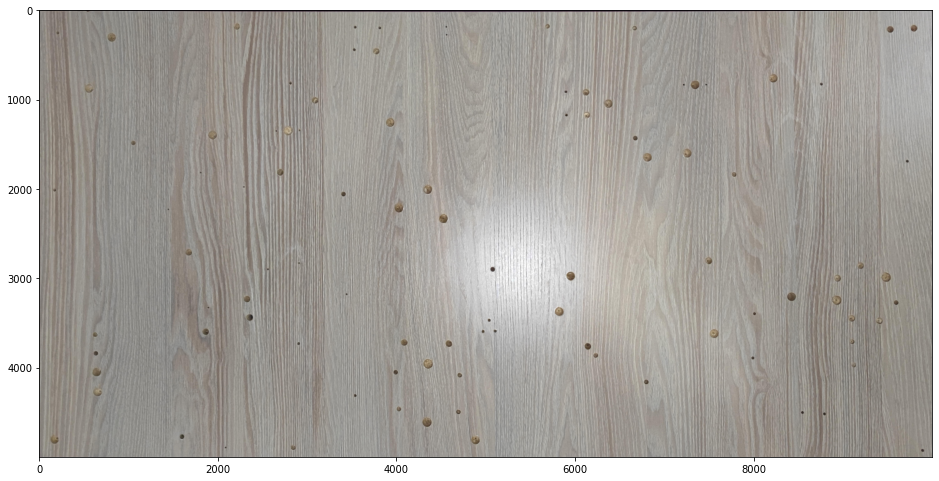

In [379]:
#img_blur = cv2.GaussianBlur(img, (5, 5), 1)
plt.figure(figsize=(16, 9))
plt.imshow(img)
img_flatten = flatten_img(img_blur)

In [380]:
%%time
pred = model.predict(img_flatten)
#img_tmp = pred[:, 0].reshape(img.shape[0], img.shape[1])
#plt.imshow(img_tmp, cmap='gray')

CPU times: user 12min 35s, sys: 1min 36s, total: 14min 11s
Wall time: 10min 38s


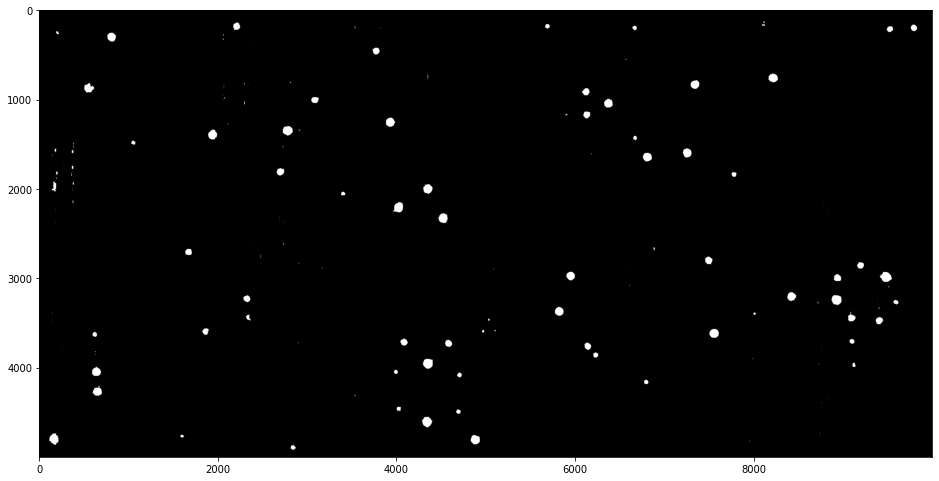

In [381]:
pred_binary = np.asarray(list(map(lambda x: 0 if x[0] < x[1] else 1, pred)), dtype=np.uint8)
img_mask = pred_binary.reshape(img.shape[0], img.shape[1])
plt.figure(figsize=(16, 9))
plt.imshow(img_mask, cmap='gray');

In [332]:
print(img_mask.shape)
img_mask
#imsave('mask_perceptron.jpg', img_mask);

(5000, 10000)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [333]:
img_mask_255 = 255 * img_mask

In [334]:
img_mask_255
img_mask_255.shape

(5000, 10000)

In [335]:
img_mask_255.dtype
cv2.imwrite('demo.png', img_mask_255)

True

In [336]:
#circles = np.zeros((200, 3), dtype=np.uint8)
img = cv2.imread('demo.png')
img_real = imread('res.jpg')
rows = 5000
img_test = img.copy()
img_test
circles = cv2.HoughCircles(img_mask_255, cv2.HOUGH_GRADIENT, 2, rows/32,
                          param1=100, param2=20,
                          minRadius=10, maxRadius=50)
#circles = cv2.HoughCircles(img_test, cv2.HOUGH_GRADIENT, 1, 1)
circles

array([[[5825. , 3371. ,   48.8],
        [3933. , 1255. ,   48.8],
        [7259. , 1599. ,   48.8],
        [ 645. , 4045. ,   48.8],
        [6377. , 1045. ,   48.8],
        [6811. , 1643. ,   48.8],
        [5955. , 2973. ,   46.6],
        [7345. ,  829. ,   48.8],
        [8219. ,  759. ,   48.8],
        [6123. ,  913. ,   40.8],
        [7555. , 3617. ,   48.8],
        [9799. ,  199. ,   35.2],
        [2213. ,  179. ,   39.8],
        [ 653. , 4267. ,   48.8],
        [4585. , 3729. ,   39.6],
        [8427. , 3203. ,   46.6],
        [3773. ,  457. ,   40. ],
        [2777. , 1349. ,   48.8],
        [2705. , 1811. ,   42. ],
        [3089. , 1001. ,   40. ],
        [6131. , 1171. ,   36.6],
        [1675. , 2709. ,   38.2],
        [7501. , 2797. ,   40. ],
        [8941. , 2997. ,   39.6],
        [9407. , 3475. ,   37.6],
        [9199. , 2853. ,   37. ],
        [5693. ,  181. ,   25.2],
        [1869. , 3597. ,   35.6],
        [ 809. ,  299. ,   44.4],
        [6143.

In [337]:
# img_canny = cv2.Canny(img_test, 100, 150)
# plt.imshow(img_tmp, cmap='gray')

1.(5825,3371), diameter: 98
2.(3933,1255), diameter: 98
3.(7259,1599), diameter: 98
4.(645,4045), diameter: 98
5.(6377,1045), diameter: 98
6.(6811,1643), diameter: 98
7.(5955,2973), diameter: 94
8.(7345,829), diameter: 98
9.(8219,759), diameter: 98
10.(6123,913), diameter: 82
11.(7555,3617), diameter: 98
12.(9799,199), diameter: 70
13.(2213,179), diameter: 80
14.(653,4267), diameter: 98
15.(4585,3729), diameter: 80
16.(8427,3203), diameter: 94
17.(3773,457), diameter: 80
18.(2777,1349), diameter: 98
19.(2705,1811), diameter: 84
20.(3089,1001), diameter: 80
21.(6131,1171), diameter: 74
22.(1675,2709), diameter: 76
23.(7501,2797), diameter: 80
24.(8941,2997), diameter: 80
25.(9407,3475), diameter: 76
26.(9199,2853), diameter: 74
27.(5693,181), diameter: 50
28.(1869,3597), diameter: 72
29.(809,299), diameter: 88
30.(6143,3763), diameter: 76
31.(4089,3713), diameter: 80
32.(9103,3707), diameter: 56
33.(9101,3437), diameter: 84
34.(2845,4891), diameter: 52
35.(1055,1485), diameter: 48
36.(9

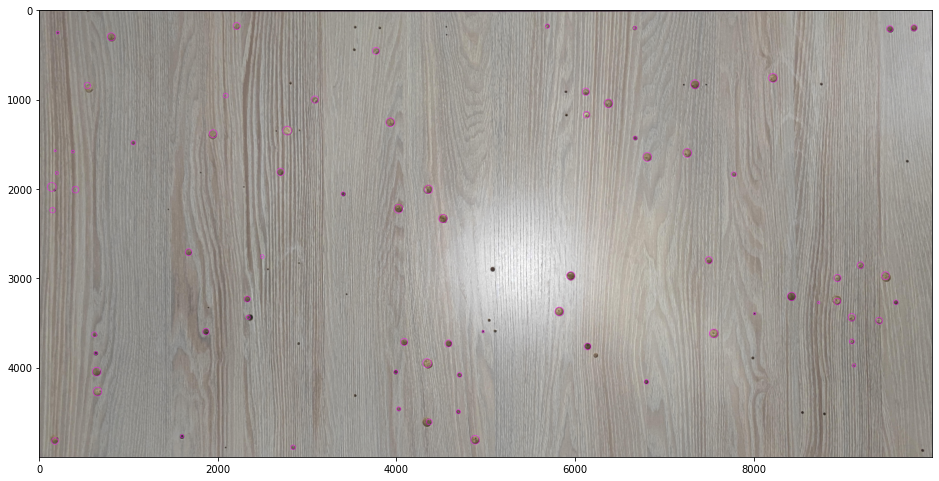

In [338]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    count = 0
    for i in circles[0, :]:
        center = (i[0], i[1])
        cv2.circle(img_real, center, 1, (0, 100, 100), 3)
        radius = i[2]
        cv2.circle(img_real, center, radius, (255, 0, 255), 3)
        print(f"{count + 1}.({i[0]},{i[1]}), diameter: {i[2] * 2}")
        count += 1
        
plt.figure(figsize=(16, 9))
plt.imshow(img_real, cmap='gray');